  Import Libraries
 

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Load and Preprocess Images

In [2]:
import os
import cv2

# Your dataset path (use a raw string)
data_dir = r"C:\Users\harini p\OneDrive\Desktop\Drowsiness Detection\dataset\Drowsiness_Dataset"
categories = ["closed_eye", "open_eye"]  # MATCHES your real folders

data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)  # closed_eye = 0, open_eye = 1

    if not os.path.exists(path):
        print(f"Folder not found: {path}")
        continue

    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, (64, 64))
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

print("Total images loaded:", len(data))
print("Total labels loaded:", len(labels))


Total images loaded: 48000
Total labels loaded: 48000


 Data Preprocessing


In [3]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize data (convert [0, 255] → [0, 1])
data = np.array(data) / 255.0
data = data.reshape(-1, 64, 64, 1)

# Convert labels to one-hot (2 classes: closed_eye = 0, open_eye = 1)
labels = to_categorical(labels, num_classes=2)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 38400
Test samples: 9600


Build CNN Model in Keras

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Prevent overfitting
model.add(Dense(2, activation='softmax'))  # 2 output classes

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\harini p\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,834 (6.20 MB)

 Trainable params: 1,624,834 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [5]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 52s 41ms/step - accuracy: 0.8801 - loss: 0.2624 - val_accuracy: 0.9722 - val_loss: 0.0800
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9729 - loss: 0.0822 - val_accuracy: 0.9832 - val_loss: 0.0508
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9786 - loss: 0.0617 - val_accuracy: 0.9881 - val_loss: 0.0388
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9881 - val_loss: 0.0338
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 41ms/step - accuracy: 0.9873 - loss: 0.0398 - val_accuracy: 0.9873 - val_loss: 0.0398
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 41ms/step - accuracy: 0.9890 - loss: 0.0339 - val_accuracy: 0.9910 - val_loss: 0.0293
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 41ms/step - accuracy: 0.9903 - loss: 0.0280 - val_accuracy: 0.9911 - val_loss: 0.0265
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 41ms/step - accuracy: 0.9917 -

Evaluate the Model    

Note: you may need to restart the kernel to use updated packages.
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9881 - loss: 0.0346
✅ Test Accuracy: 98.91%
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report:

              precision    recall  f1-score   support

      Closed       0.98      0.99      0.99      4764
        Open       0.99      0.98      0.99      4836

    accuracy                           0.99      9600
   macro avg       0.99      0.99      0.99      9600
weighted avg       0.99      0.99      0.99      9600



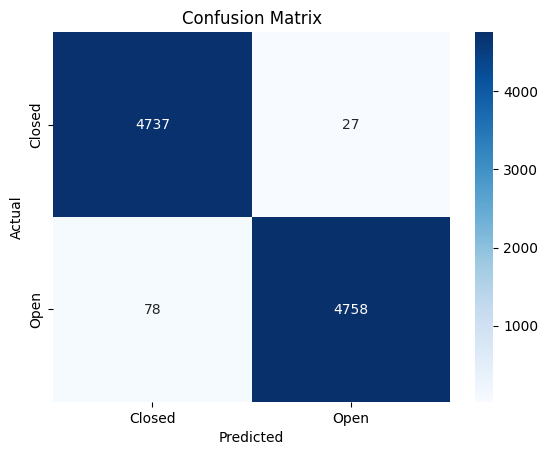

In [6]:
%pip install seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=["Closed", "Open"]))

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Closed", "Open"], yticklabels=["Closed", "Open"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [7]:
model.save(r"C:\Users\harini p\OneDrive\Desktop\Drowsiness Detection\model\drowsiness_model.h5")
print("✅ Model saved successfully.")


✅ Model saved successfully.
